In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

import os 
import numpy as np

In [244]:
pd.options.mode.chained_assignment = None
chunksize=5000
chunk = pd.read_csv("small_email.csv", chunksize=chunksize)
data = next(chunk)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
file       5000 non-null object
message    5000 non-null object
dtypes: object(2)
memory usage: 78.2+ KB


In [200]:
data.to_csv("small_email.csv", index=False)

In [136]:
print(data.iloc[200,1])

Message-ID: <19273922.1075855691259.JavaMail.evans@thyme>
Date: Thu, 6 Apr 2000 05:18:00 -0700 (PDT)
From: phillip.allen@enron.com
To: mike.grigsby@enron.com
Subject: Alliance netback worksheet
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Mike Grigsby
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 04/06/2000 
12:18 PM ---------------------------
   
	
	
	From:  Julie A Gomez                           04/01/2000 07:11 AM
	

To: Hunter S Shively/HOU/ECT@ECT, Phillip K Allen/HOU/ECT@ECT
cc:  
Subject: Alliance netback worksheet

Hello Men-

I have attached my worksheet in case you want to review the data while I am 
on holiday.

Thanks,

Julie  :-)





In [ ]:
t = pd.read_csv("cleaned_small_email.csv")

In [ ]:
t.iloc[50]

In [52]:
t.message[t.message.isna()]

23      NaN
30      NaN
34      NaN
35      NaN
50      NaN
       ... 
4323    NaN
4324    NaN
4575    NaN
4873    NaN
4876    NaN
Name: message, Length: 110, dtype: object

Premier essai pour enlever les forwarded : 

In [201]:
t = data.iloc[16,1].split("\n")
k = False
c = 0
s = t.copy()
for i,line in enumerate(t) : 
    if "Forwarded by" in line : 
        k = True
    if k : 
        del s[i-c]
        c+=1
    if "Subject: " in line : 
        print("yes", i, line)
        k = False
 
    
t = s

yes 4 Subject: Var, Reporting and Resources Meeting
yes 30 Subject: Var, Reporting and Resources Meeting


In [11]:
print('\n'.join(t))

Message-ID: <19773657.1075855687649.JavaMail.evans@thyme>
Date: Wed, 4 Oct 2000 09:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Var, Reporting and Resources Meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf


Please plan to attend the below  Meeting:


                                Topic:  Var, Reporting and Resources Meeting
        
  Date:  Wednesday, October 11th

  Time:  2:30 - 3:30 

  Location: EB30C1

  

 If you have any questions/conflicts, please feel free to call me.

Thanks,
Rain
x.31560









### Premier clean vraiment rapide 

In [246]:
data["Date"] = data.message.str.split("\n").str[1].str.split("Date: ").str.join('')
data.Date = pd.to_datetime(data.Date)
data["From"] = data.message.str.split("\n").str[2].str.split("From: ").str.join('')
data["To"] = data.message.str.split("\n").str[3].str.split("To: ").str.join('')
data["Subject"] = data.message.str.split("\n").str[4].str.split("Subject: ").str.join('')

In [247]:
data.message = data.message.str.split("\n").str[15:].str.join('\n').str.lower()
for i,message in enumerate(data.message) :
    if "Forwarded by" in message : 
        data.message[i] = "\n".join(message.split("\n")[9:]).strip()
        
data.message = data.message.str.replace("\n", ' ').str.strip()

In [248]:
data

,file,message,Date,From,To,Subject
0,allen-p/_sent_mail/1.,here is our forecast,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,
1,allen-p/_sent_mail/10.,traveling to have a business meeting takes the...,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:
2,allen-p/_sent_mail/100.,test successful. way to go!!!,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test
3,allen-p/_sent_mail/1000.,"randy, can you send me a schedule of the sal...",2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,
4,allen-p/_sent_mail/1001.,let's shoot for tuesday at 11:45.,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
5,allen-p/_sent_mail/1002.,"greg, how about either next tuesday or thurs...",2000-08-31 04:17:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
6,allen-p/_sent_mail/1003.,please cc the following distribution list with...,2000-08-22 07:44:00-07:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",
7,allen-p/_sent_mail/1004.,any morning between 10 and 11:30,2000-07-14 06:59:00-07:00,phillip.allen@enron.com,joyce.teixeira@enron.com,Re: PRC review - phone calls
8,allen-p/_sent_mail/101.,1. login: pallen pw: ke9davis i don't think...,2000-10-17 02:26:00-07:00,phillip.allen@enron.com,mark.scott@enron.com,Re: High Speed Internet Access
9,allen-p/_sent_mail/102.,---------------------- forwarded by phillip k ...,2000-10-16 06:44:00-07:00,phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...


En première approche : 
- virer les forward et voir leur proportion
- comment traiter les reply et les forwarded ? 
- Rajouter forwarded ou pas ? 


### Cleaning message : 

On enlève les stopwords, la ponctuation, les noms propres(avec Spacy),on tokenize, on lemmatize 

In [249]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer  
from tokenize import tokenize
from string import punctuation
import nltk
import spacy
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = stopwords.words("english")
stopwords.append("") # rajouter des stopwords ???? 

[nltk_data] Downloading package stopwords to /Users/yang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [119]:
! pip install -U spacy
! python -m spacy download en_core_web_lg

Requirement already up-to-date: spacy in /anaconda3/lib/python3.7/site-packages (2.2.3)
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [250]:
def remove_punctuation(data) : 
    for punc in punctuation :
        data.message = data.message.str.replace("\\d", '')
        data.message = data.message.str.replace(punc,'')
    return data
data = remove_punctuation(data)
#Regarde pour la ponctuation si utile ou pas

In [251]:
def tokenize(data) : 
    data.message = data.message.str.split(" ")
    return data

data1 = tokenize(data)

In [237]:
def remove_stop_words (data) : 
    for i,message in enumerate(data.message) :
        
        data["message"][i] = [word for word in message if word not in stopwords]
        
    return data

data = remove_stop_words(data)

In [243]:
from __future__ import unicode_literals

In [261]:
import en_core_web_lg


def remove_names(data):
    #nlp = spacy.load('en_core_web_lg')
    nlp = en_core_web_lg.load()
    for i, message in enumerate(data.message):
        doc = nlp(str(message))
        Persons=[]
        person = [w for w in doc.ents if w.label_ in ["PERSON"]]
        print(person)
        Persons.append(person)
        # for item in person:
        #    message=message.remove(item)
        # data["message"][i]=message
        #data["message"][i] = [word for word in message if word not in person]
    # print(person)
    return data, persons


data, persons = remove_names(data)

[]
[austin]
[]
[randy, phillip]
[]
[phillip]
[mike, keith, monique, sanchez, lavorato, allen]
[]
[]
[buckner, burnertip, buckner]
[buckner, allen]
[lucy, phillip]
[keith, keith, burchfieldhouect, russ, hahouectect]
[keith, keith, burchfieldhouect, russ, hahouectect]
[phillip]
[paula, phillip]
[airam, phillip, vladimir, rita, laura, kimberly, araceli, kimberly, hillishouectect]
[tim, grigsby, phillip]
[richards, larry, westgate, westgate, westgate, marcos, westgate, marcos, marcos, marcos, richards]
[nancy, whittnaenronenron, bieniawskicorpenronenron, tyrell, mrhanaenronenron, monica, nancy]
[phillip]
[]
[phillip]
[allen]
[allen]
[richards, larry, claudia, crocker, austin, larry, keith, richards]
[richards, larry, claudia, crocker, austin, larry, keith, richards]
[russ, seversonhouect, phillip, russ, seversonhouect, sturm, russ, shivelyhouectect, jeffrey, russ, jayant, krishnaswamyhouectect, russell, shivelyhouectect, jeffrey, russ, jayant, krishnaswamyhouectect, russell, jeffrey, gosse

[frogger, frogger, shockmachine, frogger, shockmachine, shockmachine, shockmachine, frogger]
[walters, tara, phil, torrey, moorer, tara, mick, walters]
[phillip]
[lucy, gary, mary, phillip]
[]
[tim, caiso, caiso, caiso, caiso]
[]
[robert, httpecthouwebclntectenroncomgas, hoskins]
[robert, httpecthouwebclntectenroncomgas, hoskins]
[httpecthouwebclntectenroncomgas, hoskins]
[allen]
[phillip]
[lucy, phillip]
[phillip]
[evelyn, coles, phillip]
[sullivan, stanfield, gdpmalin, nwplopal, sumas]
[mary, phillip]
[]
[lucy]
[lucy, phillip]
[epng, allen]
[californias]
[]
[phillip]
[jeffrey, shankman, keith, mike, jeffrey, shankmanhouect, bruce, mike, jeffrey]
[phillip]
[phillip, allen]
[dyer, christopher, mike, laird]
[jane, jane, dyer, jane, janie, larry, laird]
[neal, keith]
[tim, beldenhouectect]
[tim, beldenhouectect]
[]
[]
[mary, gary, phillip]
[]
[rangel]
[gomez, shivelyhouectect]
[gomez, shivelyhouectect]
[gawain, phillip]
[]
[mac, phillip]
[mac, smith, webber, phillip]
[]
[phillip]
[janie,

[reagan, larry, phillip]
[reagan, reagan, phillip]
[reagan, reagan, phillip]
[smtpsvc, pab, scsatkfacaprocknet, xmimetrack, enemtaenronrelease, reagan, reagan, phillip]
[reagan, reagan, phillip]
[chad, phillip]
[]
[reagan, hardi, bannister, kipp]
[larry, jacques, claudia, phillip]
[jacques, larry, phillip]
[]
[]
[phillip]
[phillip]
[mike, phillip]
[reagan]
[]
[marcos, phillip]
[keith]
[jacques, larry, phillip]
[erika, alain, christina, sharon, monica, amanda, kyle, artemio, eugene, brandon, roger, kristann]
[]
[larry, jacques, claudia, phillip]
[marcos, elizondo, gordon, phillip]
[jacques, larry, larry, larry, phillip]
[bloomberg]
[jacques, phillip]
[]
[phillip]
[jacques, larry, keith, phillip]
[mike, matt, mike]
[lucy, phillip]
[monique, sanchez, matt]
[hourtohour, californias]
[phillip]
[mapttraxls, mapttraxls]
[lucy, phillip]
[keith]
[phillip]
[richards, keith, larry, claudia, crocker, austin, keith, keith, mm, mm, mm, claudia, crocker, richards, larry, claudia, crocker]
[]
[marcos,

[steven, tim, beldenhouectect, bradfordhouectect, robert, dasovichnaenronenron, susan, richard, shapironaenronenron, kaufmanpdxectect, mary, hartsoecorpenronenron, davis]
[grigsby, mm, mm, mm, mm, mm, mm, mm, mm, mm, mm, mm, mm, phillip]
[larry]
[larry, phillip]
[marcos, allen]
[leander, phillip]
[socals, phillip]
[lucy, phillip]
[monique, sanchez, randy, matt, lenhart]
[stanfield, sumas, roosevelt, phillip]
[]
[]
[]
[]
[larry, larry, phillip]
[phillip]
[]
[whalley, lavoratos]
[]
[darron, gironhouectect, mike, monique, sanchezhouectect]
[larry, phillip]
[lucy, phillip]
[lucy, phillip]
[cantrell, phillip, hartsoecorpenronenron, mary, shapironaenronenron, stephanie, steven]
[]
[sarah, steven, keannaenronenron, shapironaenronenron, dasovichnaenronenron, kaufmanpdxectect, phillip, mary, donna, hartsoecorpenronenron, sarah, jeffrey, sandiegodoc]
[lucy, gonzalez]
[]
[phillip]
[paula, phillip]
[richards, larry, mm]
[keith, janie, tori, monique, sanchez, barry, whitt, lucci, barry, phillip]
[k

[lucy, phillip]
[chapman, janet, gary, hickersonhouectect, jere, jeffrey, haedickehouectect, vince, kaminskihouectect, julia, jeffery, brad, tim, beldenhouectect, brian, blackhouectect, greg, brad, bradleyhouectect, craig, christopher, douglas, deffnerhouectect, craig, david, howecorpenronenron, kyle, lagrastahouectect, randal, rodney, malcolmhouectect, michael, jesus, melendrezcorpenronenron, edward, michelle, andrea, hunter, shivelyhouectect, staleylonectect, bruce, carl, max, beckhouectect, cocavessiscorpenronenron, hedstromcalectect, sheila, knudsencorpenronenron, jordan, mintzhouectect, mike, aronowitzhouectect, edward, bryan, ducotehouectect, douglas, stinson, barbara, jeffrey, jesse, mike, gregory, doblernaenronenron, steven, delaineyhouectect, marsha, stella, elyhouectect, kimberly, hillishouectect, yolanda, fordhouectect, donna, katherine, barbara, lewishouectect, janette, kimberly, claudette, elena, catherine, dumontpdxectect, betty, nicole, mayerhouectect, sherri, susan, tin

[stephanie, jane, shapironaenronenron]
[hartsoecorpenronenron, kean, kaufmanpdxectect, richard, shapironaenronenron, steve, kean, ken, ken]
[]
[tim, keith, holtz, sarr, phillip]
[]
[kipp, flores, allen]
[phillip]
[allen]
[phil, californias]
[]
[]
[stephanie, jane, shapironaenronenron]
[]
[eric, bensonnaenron, janet, steffesnaenronenron, shelley]
[phillip]
[]
[]
[phillip, allen]
[]
[buckley]
[andrea, bryan, phillip]
[chad]
[httppostcardsnytimescomspecialspostcardsc, lennon, httpwwwnytimescomyrmodayautoc, pacheco, lennon, kozinn, lennon, jack, douglas, lennon, beatlefan, lennon, yoko, httpwwwnytimescomlearningparentsconversationc, meislin]
[nicolay, hartsoe, rebecca, cantrell, ruth, stephanie, miller, phillip, jane, pallennsf, stephanie, jane, shapironaenronenron]
[]
[]
[]
[buckley]
[chad, phillip]
[]
[]
[phillip]
[barry, roger, migliano, andy, marde, jesus, christina, amanda, robinson, alain, hewitt, listdoc]
[lamar, austin, jeanette, peterson, phillip]
[austin, austin, leander, matt]
[

[lien, phillip]
[susan, sally, beck, larry, phillip]
[jeffrey, gossett, larry, susan, kyle, larry, larry, sally, beckhouectect, jeffrey, susan, errol, susan, larry]
[lucy, jeff, smith, gary, phillip]
[lucy, jeff, smith, gary, phillip]
[]
[lucy, gonzalez]
[larry, sally, beckhouectect, jeffrey, susan, errol, susan, larry]
[susan, phillip]
[jacques, phillip]
[allen]
[]
[]
[]
[lien, lien, lien, phillip]
[susan, angela, cathy, christina, christopher, craig, debora, douglas, edward, sackscorpenronenron, eric, erika, evan, gayle, kingerskinaenronenron, hartsoecorpenronenron, leasa, lopezhoueesees, leticia, marsha, sundehoueesee, michelle, mike, neil, neil, kaufmanpdxectect, paula, shapironaenronenron, rita, robert, rosalinda, sarah, sharon, susan, tanya, lairhoueesees, beldenhouectect, vicki, vladimir, bradfordhouectect, sandershouectect, robert, donna, kathryn, bruno, linda, triboletcorpenronenron, phillip, robert, susan, douglass, cpuc, viii, dan]
[]
[]
[lucy, phillip]
[susan, angela, cathy

[idfs, eestestwbpccs, trevino, nahouwwirfd]
[edwards, edwards, edwards, bernstein, rform, edwards, webber]
[ken, forbes, ron, walter, jose, stephen, houstonbased, energytrading, dynegys, bergstrom]
[]
[rio, ramon, yvonne]
[craigbreslauenroncom, bobbowenenroncom, larrymayenroncom, espinoza, veronica, brackett, debbie, bradford, conner, fitzgerald, genia, patrick, theriot, yoder, miller, mike, kimberly, pereira, susan, perlman, andrea, shankman, jeffrey, sorenson, jefferson, steven, baughman, edward, bowen, brazaitis, greg, breslau, craig, brad, oenronounacnrecipientscnbcolema, chris, jungsuk, jane, mellencamp, barbara, mary, nemec, mary, craig, sturm, geoff, keith, keavey, peter, grigsby, mike, mulholland, sarah, oenronounacnrecipientscnjbarker, oenronounacnrecipientscnmfleming, dickson, stacy, ewing, linda, kyle, hanson, kristen, eubanks, sheetal, lavorato, martin, mahmassani, oenronounacnrecipientscnsmahmass, knoblauh, gregory, mccairns, ragan, ron, jennifer, audrey, seibel, christina

[ryan, phillip, alonso, robert, clark, cowan, mike, grigsby, mike, keith, huang, jason, tori, lucci, chris, martin, miller, stephanie, sanchez, monique, steven, swerzbin, jane, barry, whitt, wolfe, jason]
[httpwwwthestreetcomtscaboutprivacyhtml]
[httpitcappscorpenroncomsrrsauthemaillinkaspidpageapproval]
[httpschwabednetuduucvjjutwunaejf, charl, rposes, charles]
[mcmahon, andy]
[amgn, edwards, kets, crowell, wessels, dakin, edward, robertson, stephens, cowen, smith, dillon]
[jeff, smith, smith, austin]
[hayo, hayo, hayo, hayo, anytimesm, hayo, hayo, lowfrequency, hbutton]
[morp, heus, lickety, mac, mac, bestofbreed, tatements]
[corporationcpn, gerard, klauer, smith, dillon]
[reininger]
[jane, mailtocapcongmueduenron, httpwwwcapitolconnectionorg, reininger, httpwwwcapitolconnectionorg]
[edwards, edwards, edwards, bernstein, edwards, webber, smith, wessels]
[jdsu, jds, uniphase, earni, jdsu, jdsu, wessels, robertson, stephens, cowen, smith, hambrecht, dillon]
[httpitcappscorpenroncomsrrs

[azzahir, hakim, pinkston, muhsin, muhammad, 'gg', hakim, pinkston, freddie, muhammad, muhammad, russell, donovan, mcnabb, brady, vinny, brady, bledsoe, brady, chris, kerry, eddie, michael, curtis, martin, martin, keith, simmons, terrell]
[wwwawchoustonorg, wwwtechxansorg, gatsby, wwwtechxansorg, wwwawchoustonorg, houstons, linda, flores, hess, witi, wwwtechxansorg, removetechxansorg]
[]
[httpitcappscorpenroncomsrrsauthemaillinkaspidpageapproval]
[howard, geninfovcf]
[]
[]
[nahou, hudson, nahoumsmbxv, nahoumsmbxv, hudson, mccrory, chewbacca, enpower, enpower, enpower, goebel, enpower, \tcharlene]
[carr, xbox, xbox, preston]
[phillip, martin, keith, puthigai, oenronounacnrecipientscnsputhiga, engel, mary, lindsay, lindsay, renaud, enrononline]
[craigbreslauenroncom, bobbowenenroncom, larrymayenroncom, \tjimwillisenroncom, daviddraperenroncom, contenttype, textplain, charsetusascii, espinoza, veronica, brackett, debbie, bradford, conner, fitzgerald, genia, patrick, theriot, yoder, miller

[carr, somogyi]
[httpitcappscorpenroncomsrrsauthemaillinkaspidpageapproval]
[jane]
[]
[]
[httpitcappscorpenroncomsrrsauthemaillinkaspidpageapproval]
[howard, christina, kirby, lora, robles, howard, geninfovcf]
[kirk, actorsactresses, kirkmcdanielenronc, sheri, reese, lamar, frazier, kirk, kirk, kirk, cramer, sheri, sheri, johnson, chris, ciotoli, anywayweve, chris, chris, laura, sheri, torre, garcia, chen, rick, lee, laura, torre]
[lavorato]
[]
[]
[argentinas, twoyear]
[]
[]
[martin]
[ryan, phillip, grigsby, mike, keith, huang, jason, keiser, tori, miller, stephanie, ryan, oenronounacnrecipientscnjreitme, lindberg, susan, smith, matt, steven, jane, whitt, wolfe, jason]
[yevgeny, tim]
[]
[]
[jeffrey, stacey, stacey]
[stephanie, stephanie, martin, jennifer, stephanie]
[]
[]
[]
[iwon, iwon, iwon, iwon]
[carr, robert, robert]
[httpitcappscorpenroncomsrrsauthemaillinkaspidpageapproval]
[twoweek, twoweek, littleknown, twoweek, twoweek, httpwwwthestreetcomtscaboutprivacyhtml]
[httpitcappscorp

[richterhouectect, robert, beldenhouectect, phillip]
[]
[phil]
[mmbtuday, phillip]
[httpwestpowerenroncomcagenerationdefaultasp]
[richards, larry]
[hotmail]
[kristian, lande, christopher, mcdonaldsfectect, laird, dyersfectect, terry, donovanhouectect, tim, beldenhouectect, matt, chris, malowneyhouectect, stewart, nixon]
[phillip, sherri, rio]
[httpwwwgreenbuildercomdirectory]
[barry, barry, barry]
[iknockum, lucy, lucy, lucy, lucy, sweetsixteen, lucy, lucy]
[]
[keith, janie, tori, monique, sanchez, barry, whitt, lucci, barry, phillip]
[keith, janie, tori, monique, sanchez, barry, whitt, lucci, barry, phillip]
[richards, larry, mm]
[lucy, gonzalez]
[darron, gironhouectect, mike, monique, sanchezhouectect]
[lucy, phillip]
[richards]
[rahal, clinton, rahal, phillip]
[tim, beldenhouect, kristian, lande, christopher, mcdonaldsfectect, laird, dyersfectect, terry, donovanhouectect, saji, beldenhouectect, robert, jeffrey]
[]
[lucy, gonzalez, lucy]
[carla, hoffman, tim, beldenhouectect, robert,

[susan, angela, cathy, christina, christopher, craig, debora, douglas, edward, eric, erika, evan, gayle, kingerskinaenronenron, jeremy, hartsoecorpenronenron, leasa, lopezhoueesees, leticia, marsha, michelle, neil, neil, kaufmanpdxectect, paula, shapironaenronenron, rita, robert, rosalinda, sarah, sharon, susan, tanya, lesliehoueesees, tasha, lairhoueesees, terri, tim, beldenhouectect, vicki, vladimir, bradfordhouectect, richard, robert, donna, kathryn, bruno, linda, triboletcorpenronenron, phillip, mary, dasovichnaenronenron, dirk, mike, shapironaenronenron]
[jacques, keith]
[lucy, phillip]
[janie, matt, randy, phillip, allen]
[austin]
[lucy, phillip]
[barry, mike, luccinaenronenron, stephanie, barry, whittnaenronenron, stephanie]
[barry, luccinaenronenron]
[]
[]
[robert, christopher, cynthia, delaineyhouectect, elizabeth, elizabeth, wolfehouectect, dasovichnaenronenron, jeffrey, hartsoecorpenronenron, kathryn, keith, kristin, lawnernaenronenron, linda, marcia, mary, mary, triboletcor

[reagan, kipp, flores, phillip]
[tim, grigsby, phillip]
[steffesenron, alvarez, steve, waltonhouectect, susan, lawnernaenronenron, donna, linda, reviseadd]
[epng, allen]
[kristin, louise, dasovichnaenronenron, chris, tim, kaminskihouectect, steven, keannaenronenron, prestohouectect, claudio, richard, shapironaenronenron, kristin, walsh, issuancebridge, davis, davis, bowen, strickland, taxexempt, davis, bowen]
[tara, phillip, alvarez, steve, waltonhouectect, susan, lawnernaenronenron, donna, linda, reviseadd]
[]
[jacques, craig, phillip]
[contenttype, textplain, charsetusascii, jacobson, jacobson, kevin, mcgowan, matt, goering, staley, massey, andrews, siegel, kristin, quinn, heather, elizabeth, watson, dobler, kevin, sturm, rogers, robert, dana, davis, jacoby, kellermeyer, mitch, robinson, moore, naveed, kate, schroeder, brian, robert, jeffrey, keeler, mary, schoen, stacey, bolton, bradley, schmidt, jacoby, yoho, nicolay, kingerski, shapiro, gavin, dillingham, lora, sullivan, linda, ro

[alfred, newman, armando, martinez, bryan, craig, carter, tamez, ritter, wolfe, steve, ron, henry, murphy, wolfe, armando, martinez, martinez]
[]
[stephanie, stephanie, stephanie]
[jreitmeyer]
[mm, phillip]
[louise, tim, calger, christopher, robinson, luce, lavorato, myers, brackett, louise]
[larry, larry, renee, renee, renee, phillip, allen]
[howard]
[howard, christina, kirby, lora, robles, howard, geninfovcf]
[kirk, kirk, kirk]
[michelle, kirk, kirk, kirk, yevgeny, michelle, tim, kirk, kirk, kirk, phillips]
[reese, lamar, frazier, kirk, kirk, kirk, cramer, sheri, sheri, johnson, chris, ciotoli, anywayweve, chris, chris, laura, sheri, torre, garcia, chen, rick, lee, laura, torre]
[]
[]
[]
[ryan, phillip, alonso, robert, clark, cowan, mike, grigsby, mike, keith, huang, jason, keiser, tori, lucci, chris, martin, miller, stephanie, susan, oenronounacnrecipientscnsscott, steven, swerzbin, jane, barry, whitt, wolfe, jason, ryan]
[austin, austins, salido, austin]
[]
[jwillsswbellnetenron, a

[phillip]
[barry, mike, barry, martin, barry, luce, mcmichael, eric, katherine, roberts, linda, redmond, miller, kevin, whitt, martinez, jennifer, barry, magnolia]
[mailtorichardtoubiatruequotecomenron]
[webber, webber, webber, phillip]
[mike, grigsby, keith, janie, kingerski, kaufman, barry, miller, stephanie, roger, kristann, courtney, becky, donna, darla, johnson]
[mike, kingerski, kaufman, barry, miller, stephanie, roger, kristann, courtney, becky, donna, darla, johnson]
[dick, supervisormanagerx]
[rangel]
[]
[mailtorichardtoubiatruequotecomenron, richard, richard, mailtoimceanotesrichardtoubiacrichardetoubiatruequ, \t\tsubject\tparty]
[]
[phillip]
[]
[]
[phillip]
[\theizenrader, swerzbin]
[phillip]
[]
[nicolay, cantrell, rebecca, sarah, johnacohenbaker, mailtozai, anginsbergelpasocom, jack, inepsaorg, jempolepsaorg, ckie, gallagher, bennett, mailtojohnrorrreliantenergy, mailtopetefrostu]
[swerzbin]
[leander, phillip]
[heather, heather]
[jacques, phillip]
[montez, phillip]
[allen]


[wilchynskihrcorpenronenron, bradley, bruce, chuck, alejandra, darron, elizabeth, elizabeth, keiserhouectect, singlahouecte, kristen, fowlernaenronenron, kyle, lillyhouectect, maria, ryan, ermishouectect, jane, keith, lenharthouectect, mik, monique, sanchezhouectect, tori, wukaschcorpenronenron, mary, mike, potternaenronenron, natalie, albert, derek, camille, cathy, ron, ronenron, andy, pacenaenronenron, claudia, jason, harrillnpngenron, martha, phyllis, denis, armstrongcorpenronenron, max, randy, cora, espeycorpenronenron, kevin, kirk, kinseyhouectect, straighthouectect, mahmassanicorpenronenron, barry, catherine, jornada, mmddyy, mmddyy]
[andy, keith, andy]
[mailtocapcongmueduenron, httpwwwcapitolconnectionorg, httpwwwcapitolconnectionorg, httpwwwcapitolconnectionorg, reininger]
[renee, allen]
[carlos, leander, austin, austin, phillip]
[jacques, phillip]
[renee, phillip, allen]
[richard, austin, barton, austin, marcos, demilec]
[\tshould]
[robert, robert]
[renee, martin, renee, larry

[keith]
[andy, chen, saji, andy]
[paula, phillip]
[celeste, celeste, celeste, dolores, dolores, dolores, celeste, celeste]
[robert]
[kimberly, jeffrey, shivelyhouectect, kristin, steve, jacksonhouectect, beckhouectect, barbara, lewishouectect, airam, arteagahouectect, cherylene, felicia, doanhouectect, irena, lavorato, hillis]
[celeste]
[]
[mike]
[]
[lavorato, kimberly, jeffrey, shivelyhouectect, jacksonhouectect, kristin, hillis]
[neal, shivelyhouectect, elsa, villarrealhouectect, jason, moore, mary, gosnellhouectect, jason, moore]
[]
[richards, larry, mm]
[phillip]
[phillip]
[matt, phillip]
[]
[]
[tim, tim, phillip]
[jeffery, beldenhouectect, bryan, deffnerhouectect, janet, craig, mike, lagrastahouectect, jesse, edward, prestohouectect, mike, shivelyhouectect, bruce, colleen, mike, carl, greg, enas]
[lucy, phillip]
[chapman, janet, gary, hickersonhouectect, jere, jeffrey, haedickehouectect, vince, kaminskihouectect, julia, jeffery, brad, tim, beldenhouectect, brian, blackhouectect, g

[phillip]
[httpwestpowerenroncomcagenerationdefaultasp]
[]
[]
[phillip, allen]
[]
[buckley]
[andrea, bryan, phillip]
[chad]
[]
[]
[buckley]
[phillip]
[chad, phillip]
[]
[]
[phillip]
[barry, roger, migliano, andy, marde, jesus, christina, amanda, robinson, alain, hewitt, listdoc]
[lamar, austin, jeanette, peterson, phillip]
[]
[richterhouectect, tim, beldenhouectect, phillip]
[phillip]
[phillip]
[mmbtuday, phillip]
[larry, claudia, phillip]
[lucy, phillip]
[bruce, austin, phillip]
[tim, beldenhouectect, matt, mallorypdxectect, richterhouectect, robert, williams, iiipdxectect, caiso, caiso, caiso]
[lucy, gary, phillip]
[]
[allen]
[jed, hershey, mayoct, mayoct, jed]
[reagan, marcos, kipp, kipp, flores, phillip, allen]
[jacques, kipp, cuatro, larry, keith, phillip]
[phillip]
[mike, keith, keith, phillip]
[kipp, marcos, phillip]
[lagrastahouectect, jess]
[jacques, flores, phillip, kipp, flores, cuatro, phillip]
[]
[deshonda, brad, megan, airam, arteagahouectect, edward, baughmanenronenronxg

[susan, angela, cathy, christina, christopher, craig, debora, douglas, edward, eric, erika, evan, gayle, kingerskinaenronenron, jeremy, hartsoecorpenronenron, leasa, lopezhoueesees, leticia, marsha, michelle, mike, neil, neil, kaufmanpdxectect, paula, shapironaenronenron, rita, robert, roger, rosalinda, sarah, sharon, susan, tanya, lesliehoueesees, tasha, lairhoueesees, terri, beldenhouectect, vicki, vladimir, bradfordhouectect, sandershouectect, robert, donna, kathryn, bruno, linda, triboletcorpenronenron, phillip, donna, robert, susan, andybrwnearthlinknet, \tplease, carlson, ellery, escalante, baker, cody, carter, hatton, curtis, gosselin, douglas, kerner, duane, eileen, koch, eisenman, derosa, jack, jack, pigott, willey, elliottsaearthlinknet, greco, ronan, kate, castillo, hoffman, kfickettusgencom, lynn, mcfadden, paula, randy, hickok, ross, stephanie, susan, mara, wetzel, andy, barnes, bbuchynskyaolcom, charles, johnson, maddox, edward, lozowicki, edwin, eric, floyd, dittmer, bur

[brian, hoskinsenron, hoskins, hoskinsenron, hoskins, brian, hoskinsenron]
[brian, hoskinsenron, hoskins, hoskinsenron]
[augsep, curveif, augsep, ngas, silverman]
[]
[jennifer, wefas, jennifer, fraserhouect, wefas, ron]
[jennifer, wefas, jennifer, fraserhouect, wefas, ron]
[brian, hoskinsenron, zhucorpenronenron, brian, brian, hoskins, hoskinsenron, brian, hoskinsenron, brian, hoskinsenron, zhucorpenronenron, brian, brian, hoskins, brian, hoskinsenron]
[sagel, sagel, checksee, sagel]
[]
[mm]
[sarah, sarah]
[sagel, checksee, sagel]
[]
[jarnoldnsf, larry, larry, mike]
[caroline, abramoenron, rgds, caroline]
[russell, perkins, whalley, limtations]
[kimberly, dana, rogers, delaineyhouectect, greg, felicia, blackhouectect, airam, arteagahouectect, jessica, nigel, patterson, nigel, patterson, lavorato, rogers, dana, davis, whalley, sturm]
[]
[]
[john]
[johnvery, nighthehe]
[kori, errol, kori]
[jarnoldnsf, hoskinsenron, zhucorpenronenron, brian, brian, hoskins, brian, hoskinsenron]
[jennifer]

[httpwwwmoneynetcomcontentinfoseekptracker]
[jennifer, httpwwwmoneynetcomcontentinfoseekptracker, satsattbk]
[quigley]
[]
[rick, buyhouectect, jeffrey, skillingcorpenronenron, doug, henry]
[jarnoldnsf, henry]
[]
[]
[]
[andy]
[silverman]
[andy]
[]
[]
[rudi, vladimir, rudi]
[]
[]
[]
[]
[]
[]
[jennifer, michelle]
[larry]
[andy, arnold]
[larry, arnoldhouectect, larry, larry]
[]
[]
[]
[]
[]
[]
[]
[rangle, kathie, michelle, kathie]
[]
[lyle, lovett, ryan, gooden]
[]
[lyle, lovett, ryan, gooden]
[]
[]
[]
[]
[steven, arnold]
[]
[]
[]
[]
[]
[sagel]
[williams, barrett]
[williams, barrett]
[]
[williams, barrett]
[]
[williams, barrett]
[sarah, sarah]
[]
[pooks]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[margaret, margaret]
[]
[]
[]
[]
[]
[]
[jason, russell, contractsday]
[]
[]
[]
[jarnoldnsf, matthews, paula]
[brad, banky, rosenberg, haupt, frase, malek, robert, russ, sanjiv, william, schaefer]
[jarnoldnsf, neal, lasala, carr]
[jarnoldnsf, russell, eric, eric, alexanderwernerussocgencomenron, gash

[jennifer, jennifer, holdalthough, williams, jennifer]
[jennifer, holdalthough, williams, jennifer]
[]
[smith, dialin, calldoc]
[forecst]
[greg, whalley, liz]
[jennifer, holdalthough, williams, jennifer]
[holdalthough, williams, jennifer]
[margaret]
[heffner, contangospx, mayie, augoctyeslow, higherlow, morethots]
[mayie, augoctyeslow, higherlow]
[bush, kahn, californias, bush, robert, shapiro, spencer, abraham, californias, kahn, kahn, californias, kahns, carter, kahns, kahn, kahn, kahn, alfred, kahn, rumsfeld, colin, powell, bushs, bush, rumsfeld, bush, bush, reagan, powell, powell, californias, davis, californias, houstons, janee, austin, californias, californias, bush, bushs, bushs, craig, bush, cheney, bush, bushs, californias, californias, californias, californias, californias, hoge, californias, californias, californias, californias, kenneth, californias, davis, bush, bushs, bush, californias, californias, kathleen, bonham, miller, miller, deena, mcclain, grinstead, jennifer, gr

[jennifer]
[jennifer, jennifer, jennifer, jennifer, jennifer, perkins]
[jennifer, jennifer, jennifer, perkins]
[]
[juliette, lavorato]
[jennifer, perkins]
[andy]
[]
[]
[rick, rgcurrymihccommx, jennifer, stewart, mxico, rick, rgcurrymihccommx, feldman]
[miertschin, sheetal, jennifer, residehouectect, justin, sarah, cindi, peter, jeffrey, edward, kevin, gary, penggpgfinenronenron, schwarzbachcorpenronenron, jefferson, chris, heather, coffinghoueesees, kolmanhouectect, simone, paula, edward, billy, larry, ryan, siurekcorpenronenron, ron, kevin, trippcorpenronenron, riddlecorpenronenron, wanda, lagrastahouectect, hudlerhouectect, edith, friedmanhouectect, brandon, oliverlonectect, gayle, patricia, christina, steven, brad, clifford, sara, kyle, hiemstrahouectect, heather, binh, jason, christa, michelle, zhanghouectect, ryan, hinzecorpenronenron, ryan, reagan, mathewsenron, blackhouectect, schwiegerhouectect, peter, ramgolamlonectect, choisfectect, ron, muenron, huangenron, lena, ravi, krist

[jarnoldnsf, matt, pyle, peter, goebel, jennifer, medcalfnaenronenron, peter, dalepatrick, dwyer, matt, peter, jennifer, medcalfnaenronenron, jennifer, cashiola, relationshipseeking, greg, pyle, austin, pyle, cashiola, austin, eserviceswireless, dwyer, pyle, matt, peter, goebel, patrick, tucker, clark, cashiola, cashiola, ravi, peter, goebel, jennifer, cashiola, peter, goebel, jennifer, pyle, peter, goebel, peter, tucker, clark, dwyer, dwyer]
[pattillos]
[jarnoldnsf, gary, gary, meyer, curtis, annett, curtis, meyer, curtis, montag, gooden, meyer, curtis, curtis, matt, surowiec, curtismeyer, gary, dennisgoodensapcom]
[jarnoldnsf, ron, howard, larry, craig, breslau, shankman, craig, breslau]
[copyso, jeff, douglas, doug, jennifer, youngfleshnaenronenron, douglas]
[vaughan, morse, jennifer, mcauliffe, douglas, cummins, randy, matson, bruce, smith, peter, goebel, darin, randy, matson, mcauliffe, jennifer, dougs, douglas]
[jennifer, peter, peter, peter, darrin, pyle, pyle, pyle, pyle, medca

[jarnoldnsf, youngfleshnaenronenron, craig, leonard, leonard]
[]
[michael, byrne, totale, partielle]
[]
[moneymy, winterwill, sideill]
[marge, mccartyetsenronenron, shelley, cordesetsenronenron, janet, kopperhouectect, elizabeth, marge]
[jennifer]
[jennifer]
[sagel, sagel, sagel]
[sagel, sagel]
[margaret]
[jennifer, hawkins, jennifer, jennifer, hawkinsotsenronenron, jennifer, colleen, colleen, rountree]
[]
[sarah, sarah]
[arnolds]
[christa, winfrey, chris, darin, talleycorpenronenron, alisa, eugenio, killenhouectect, gary, hickersonhouectect, gary, kevin, hannonenron, kimberly, hillishouectect, beniencorpenronenron, haedickehouectect, patricia, rick, buyhouectect, rudi, beckhouectect, tim, beldenhouectect, trey, hardyhouectect, shepperdhouectect, veronica, valdezhouectect, william, bradfordhouectect, delaineyhouectect, jeffrey, nelson, hamlinhouectect, jeffrey, murphyhouectect, stacey, vladimir, sunil, robin, rodriguehouectect, brian, christopher, cheryl, louiecalectect, mrhanaenronenr

[lagrastahouectect, kimberly, airam, arteagahouectect, becky, gilley, sarah, sara, gilley, enas, enas, hisher]
[jarnoldnsf, sarah]
[jennifer, jennifer, milligan, jennifer]
[brian, hoskins, mike, larry, peter, brian, mike, larry, peter, brian]
[jarnoldnsf]
[vanderbilt, airam, phillip, beckhouectect, murphyhouectect, vladimir, rita, cherylene, kimberly]
[arnolds, buckner, buckner, buckner]
[jarnoldnsf, ali, mm, busse, weatherspoon]
[buckner]
[]
[]
[carlos]
[whalley, andy]
[]
[]
[jeffrey, bren, hyundaimpeg]
[]
[]
[jarnoldnsf, dyson, jennifer, ramsey, ramsey, dyson]
[andy, louise, andy]
[andy]
[]
[]
[carr, carr]
[suicideavi]
[errol, pamela, larry, hunterhouectect, errol, demarco, charaniahouectect, theresa, broganhouectect, shifali, bob, curtis, jennifer, patricia, gerri, spencer, jefferson, carr, carr, koehler, hamilton, pamela]
[]
[vladimir, jeffrey, debbie, haydencorpenronenron, rick, lavorato, vlady]
[rick, jeffrey, dbkgnde, jaron, dbkgndec, gsnc, shellc, dbkgnde, sognpa]
[jarnoldnsf, 

[sagel]
[jarnoldnsf, kahn, httpwwwnytimescompoliticsenerhtmlexeienea, alyson]
[jarnoldnsf, jennifer]
[]
[carr, carr, httpwwwcarrfutcomresearchenergystripmatrixngpdf, httpwwwcarrfutcomresearchenergyspreadmatrixclpdf, carr]
[]
[williams, barrett]
[williams, barrett]
[]
[williams, barrett]
[]
[williams, barrett]
[pooks]
[jennifer, jeffrey, shankman, ron, howard, larry, shankman]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[jarnoldnsf, craig, howard, larry]
[]
[]
[]
[margaret, margaret]
[]
[]
[]
[imagedvd]
[karenlambertenroncom, lopez, andrea, williams, anitha, mathis, concepcion, deborah, kallus, sullivan, janice, priddy, monique, criswell, monique, mcfarland, sanchez, rena, shawn, cynthia, deborah, guillory, dinah, mccain, jennifer, mendez, cevilla, wooten, karla, dobbs, ruiz, lee, wright, maria, robin, hosea, jordan, donna, eric, gonzales, jared, kaiser, aboudaher, giuliani, boals, albert, forster, bernice, rodriguez, brian, cheryl, johnson, christopher, hargett, donna, consemiu, donna, gloria, rober

[jarnoldnsf, debbie, joao, carlos, ramon, aronowitzhouectect, jarek, baughmanenronenronxgate, kevin, tim, beldenhouectect, ron, bertasilonectect, blackhouectect, roderick, brad, riccardo, william, bunnellenrondevelopmentenrondevelopment, christopher, eduardo, nigel, craig, childershoueesees, larry, edward, remi, deborah, greg, debbie, nowak, debbie, nowak, debbie]
[sarah, mulholland, arnoldhouectect, sarah, hans, sarah, mulhollandhouectect, niamh, clarkelonectect, stewart, caroline, cronineuenronenron, angela]
[]
[scholes, mike, redmond, agnihtori]
[regardssteve]
[jarnoldnsf, peter, goebel, jennifer, medcalfnaenronenron, peter, lewisnaenronenron, jennifer, peter, peter, mcauliffe, matson, smith, bruce, smith, peter, youngfleshnaenronenron, steve, morse, morseenron, bruce, smiths, everett, randy, matson, munson, randy, matson, bernie, crowder, crowder, hawn, steve, morse, vaughan, munson, bernie, randy, matson, munson, bernie, munson, munson]
[]
[]
[quigley]
[carr, carr, httpwwwcarrfutc

[gencheva, daniela, liszewski, liszewski, liszweski, daniela, gencheva]
[daniela, liszewski, liszewski, liszweski, daniela, gencheva]
[jennifer]
[rory, mccauley]
[jarnoldnsf, chris, chris, quinn, einsenron, rabonenron, matts, chris, matt, jennifer, medcalfnaenronenron, mike, rabonenron, ross, waddell]
[]
[rory, mccauley]
[supriingly, ctsnot]
[caroline, abramoenron]
[vladimir, vlady]
[]
[perkins, theriot, hickey]
[sagel]
[]
[lavo, liz]
[jarnoldnsf, mcauliffe, randy, doug, cummins, jeff, youngfleshnaenronenron, morseenron, mm, mm, mm, mm, vaughan, stephen, morseenron, jennifer, medcalfnaenronenron, brad, eric, mertenenron, moore, randy, matson, martinez, bruce, smith, martinez, matson, smith, mm]
[jennifer, strada]
[ryan, chris, cowan, ryan, clark, draper, ryan]
[]
[]
[]
[margaret, jennifer, margaret]
[]
[margaret, jennifer, margaret]
[]
[earthsat, steve, lafontaineglobalco, rogers, steve, lafontaineglobalco, earthsat, matt, rogers]
[jarnoldnsf, youngfleshnaenronenron, douglas]
[]
[salei

[douglas, jennifer, xbcc, folderscompaq, lee, lee, engberghouectect, douglas, friedmanhouectect, lee, jackson]
[jarnoldnsf, jennifer, godfrey, bruce, lee, lee, engberghouectect, douglas, friedmanhouectect, lee, jackson]
[khoja, anthony, julia, julia, julia, cacertified, brad, brad, julia, mediumterm, julia, ali]
[jarnoldnsf, shankman, larry, ron, howard, ramsey, larry, larry, howard, larry, shankman, larry, craig, breslau, gary]
[jeffrey, shankman, craig, breslau, jennifer, robert, larry]
[jarnoldnsf, shankman, larry, jeffrey, craig, jennifer, medcalfnaenronenron, larry, gagliardicorpenronenron, continentalenron, ron, howard, larry, shankman, craig, breslau]
[jarnoldnsf, ron, howard, larry, craig, breslau, shankman, craig, breslau]
[jarnoldnsf, kemplonectect, colin, bailey]
[jarnoldnsf, jennifer, medcalfnaenronenron, kemplonectect, colin, bailey]
[jarnoldnsf, ramsey, brownlonectect, kemplonectect, ramseyepschouectect, jennifer, medcalfnaenronenron, jennifer, medcalfnaenronenron, kemplo

NameError: name 'persons' is not defined

In [267]:
lemmatizer = WordNetLemmatizer() # A comparer stemming 
def lem_words (data) :
    for i,message in enumerate(data.message) :
        for k, word in enumerate(message) :
            message[k] = lemmatizer.lemmatize(word)
        data["message"][i] = message
    return data
data = lem_words(data)

In [268]:
def get_back_to_text(data) : 
    data.message = data.message.str.join(" ")
    return data 

data = get_back_to_text(data)

In [270]:
data

,file,message,Date,From,To,Subject
0,allen-p/_sent_mail/1.,here is our forecast,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,
1,allen-p/_sent_mail/10.,traveling to have a business meeting take the ...,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:
2,allen-p/_sent_mail/100.,test successful way to go,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test
3,allen-p/_sent_mail/1000.,randy can you send me a schedule of the sala...,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,
4,allen-p/_sent_mail/1001.,let shoot for tuesday at,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
5,allen-p/_sent_mail/1002.,greg how about either next tuesday or thursd...,2000-08-31 04:17:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
6,allen-p/_sent_mail/1003.,please cc the following distribution list with...,2000-08-22 07:44:00-07:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",
7,allen-p/_sent_mail/1004.,any morning between and,2000-07-14 06:59:00-07:00,phillip.allen@enron.com,joyce.teixeira@enron.com,Re: PRC review - phone calls
8,allen-p/_sent_mail/101.,login pallen pw kedavis i dont think these...,2000-10-17 02:26:00-07:00,phillip.allen@enron.com,mark.scott@enron.com,Re: High Speed Internet Access
9,allen-p/_sent_mail/102.,forwarded by phillip k allenhouect on pm ...,2000-10-16 06:44:00-07:00,phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...


### Next step : Vectorize 

On peut travailler avec les messages comme cela, ce n'est pas un clean parfait bien évidemment mais c'ets déjà une bonne base de travail

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [22]:
vectorizer = TfidfVectorizer(min_df=10,stop_words='english')
wordvector_fit = vectorizer.fit_transform(data.message)
feature_names = vectorizer.get_feature_names()
dense = wordvector_fit.todense()


In [23]:
l = np.array(data.message)

### Clustering
#### K means++

In [24]:
N = 4
clf = KMeans(n_clusters=N, 
            max_iter=50, 
            init='k-means++',
            n_init=4)
labels = clf.fit_predict(wordvector_fit)

In [25]:
wordvector_fit_2d = dense
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)

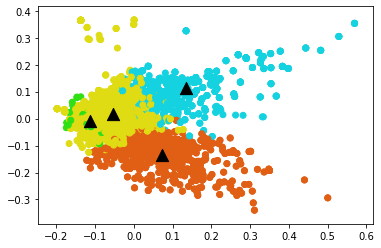

In [26]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [117]:
cluster0 = wordvector_fit[labels==0]

In [118]:
df = pd.DataFrame(data = cluster0.todense(), columns = feature_names)

In [119]:
df.head()

,able,access,account,across,actual,add,addition,additional,address,afternoon,...,without,work,working,would,xfilename,xorigin,year,yes,yesterday,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
l = sum(cluster0.todense())

In [128]:
occurences = l[0][0]

In [130]:
*sorted(zip(np.array(l)[0], feature_names))

In [144]:
z =zip(np.array(l)[0], feature_names)

In [155]:
t = [list(el) for el in sorted(zip(np.array(l)[0], feature_names), reverse=True)]

In [157]:
t2 = sorted(zip(np.array(l)[0], feature_names), reverse=True)

'phillip'


#### Agglomerative Clustering
Recursively merges the pair of clusters that minimally increases a given linkage distance.

In [33]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit_predict(dense)

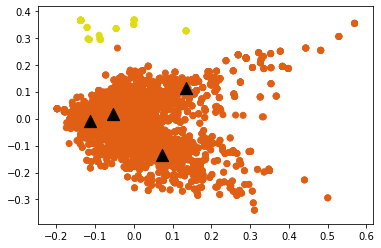

In [37]:
labels=clustering
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

#### Density-Based Spatial Clustering - DBSCAN 
DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Good for data which contains clusters of similar density.

In [39]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=10,n_jobs=-1).fit_predict(dense)


In [56]:
np.unique(labels)

array([0, 1, 2, 3])

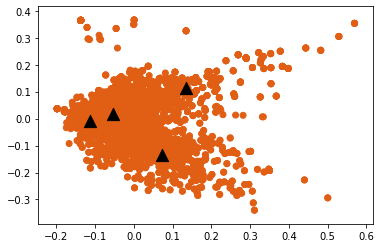

In [40]:
labels=clustering
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [ ]:
#### GaussianMixture Model GMM

In [44]:
from sklearn.mixture import GaussianMixture

clustering = GaussianMixture(n_components=4).fit_predict(dense)

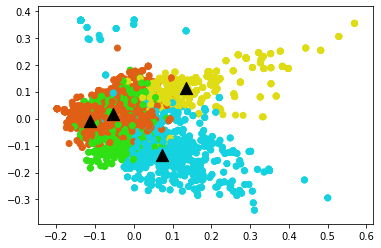

In [45]:
labels=clustering
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

### LatentDirichletAllocation

In [57]:
from sklearn.decomposition import NMF,LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
X, _ = make_multilabel_classification(random_state=0)
lda = LatentDirichletAllocation(n_components=5,
    random_state=0)
lda.fit(X)

# get topics for some given samples:
lda.transform(X[-2:])

array([[0.00360392, 0.25499205, 0.0036211 , 0.64236448, 0.09541846],
       [0.15297572, 0.00362644, 0.44412786, 0.39568399, 0.003586  ]])

In [58]:
from sklearn.decomposition import NMF,LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5,learning_method='online',
                                learning_offset=50.,
                                random_state=0)
    
lda.fit(dense)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [64]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
n_top_words = 20

print("\nTopics in LDA model:")
#tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, feature_names, n_top_words)


Topics in LDA model:
Topic #0: phillip would get pm need cost file call subject price please email allenhouect lucy like allen week still deal project
Topic #1: john pm subject cc please enron arnoldhouectect phillip gas email thanks jennifer meeting forwarded arnold get would time request message
Topic #2: message ce et paribas de nymex toute bnp ou hehub burnet nwpl sont le den est fuck chicago vous aga
Topic #3: resume buckley track interview alan karen trading zf andrea showed testing randy send round parker think fletch tried ken domain
Topic #4: liz yes kevin scott mark kimberly outlook michael david migration robert mike prestohouectect forecast please calendar meeting greg ina allenhouectect



In [271]:
from time import time
from sklearn.decomposition import NMF,LatentDirichletAllocation
n_samples = chunksize
n_features = len(feature_names)
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(dense)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
print_top_words(nmf, feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(dense)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
print_top_words(nmf, feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(dense)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
print_top_words(lda, feature_names, n_top_words)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=5000 and n_features=5068...
done in 17.399s.

Topics in NMF model (Frobenius norm):
Topic #0: gas price would market enron year think get like week know deal new day power need time trade trading one
Topic #1: john arnoldhouectect subject cc pm arnold arnoldhouect jarnoldenroncom margaret jennifer thanks matthew kim forwarded brian im tuesday lavoratoenron hey ina
Topic #2: phillip pm allenhouect forwarded allenhouectect cc from subject tim allen meeting attached hunter heizenrader beldenhouectect strategy phillipkallenenroncom fallonhouectect western robert
Topic #3: request resource approval act upon requested httpitcappscorpenroncomsrrsauthemaillinkaspidpageapproval pending application create type id name click mattsmithenroncom review admin date permanent acceptance
Topic #4: herein chart contained carr soblandercarrfutcom matrix future expressed hot via email web offer link crude nat gas differ solicitation aut

In [272]:
lda.components_

array([[0.10121309, 0.10104932, 0.10122602, ..., 0.10095078, 0.10102213,
        0.10088058],
       [1.14553045, 0.10387149, 0.10939963, ..., 0.10089283, 0.1010323 ,
        2.39314338],
       [0.10086737, 0.10087932, 0.10102346, ..., 0.1008035 , 0.10099706,
        0.10107601],
       ...,
       [0.10094152, 0.10090626, 0.1012683 , ..., 0.10089766, 0.10116992,
        0.10107564],
       [0.10100883, 0.10108461, 0.10118324, ..., 3.09835645, 0.10096945,
        0.10101374],
       [0.10094993, 0.10096136, 0.1009195 , ..., 0.10101384, 0.1010248 ,
        0.10091539]])